In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Define the chaotic map function
def peter_de_jong(x, y, a, b, c, d):
    x_new = np.sin(a * y) - np.cos(b * x)
    y_new = np.sin(c * x) - np.cos(d * y)
    return x_new, y_new


In [2]:
def encode_dna(img_arr):
    # Define the mapping from pixel values to DNA nucleotides
    nucleotides = {0: 'A', 1: 'C', 2: 'G', 3: 'T'}
    # Convert the pixel values to DNA nucleotides
    dna_arr = np.empty(img_arr.shape, dtype=str)
    for i in range(4):
        dna_arr[img_arr == i] = nucleotides[i]
    # Convert the DNA array to a string
    dna_str = ''.join(str(d) for d in dna_arr.flatten())
    return dna_str

In [3]:
def encrypt_image(img_path, a, b, c, d, iterations):
    # Load the image
    img = Image.open(img_path)
    # Convert the image to grayscale
    img = img.convert('L')
    # Convert the image to a numpy array
    img_arr = np.array(img)
    # Normalize the pixel values to the range [0, 3]
    img_arr = np.round(img_arr / 64.0).astype(np.uint8)
    # Encode the pixel values as DNA nucleotides
    dna_str = encode_dna(img_arr)
    # Generate a random initial point for the chaotic map
    x, y = 1,2
    # Iterate the chaotic map and use it to encrypt the image
    for i in range(iterations):
        x, y = peter_de_jong(x, y, a, b, c, d)
        # Use the chaotic map output to shuffle the DNA nucleotides
        dna_list = list(dna_str)
        dna_list = np.random.permutation(dna_list)
        dna_str = ''.join(dna_list)
        # Convert the shuffled DNA nucleotides back to pixel values
        img_arr = np.zeros_like(img_arr, dtype=np.uint8)
        for j, n in enumerate(['A', 'C', 'G', 'T']):
            img_arr[dna_str == n] = j
        # Use the chaotic map output to modify the shuffled pixel values
        img_arr = img_arr * x + y
    # Rescale the pixel values to the range [0, 255]
    img_arr = np.round(img_arr * 64.0).astype(np.uint8)
    # Convert the pixel values to an image
    img_encrypted = Image.fromarray(img_arr)
    
    # Save the DNA string to a file
    with open('dna_string.txt', 'w') as f:
        f.write(dna_str)
        
    return img_encrypted, dna_str

Text(0.5, 1.0, 'Original Image')

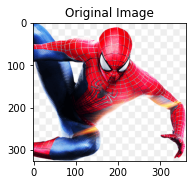

In [4]:
# Display the original and encrypted images
img_path = 'spiderman.png'
plt.subplot(1, 2, 1)
plt.imshow(Image.open(img_path))
plt.title('Original Image')

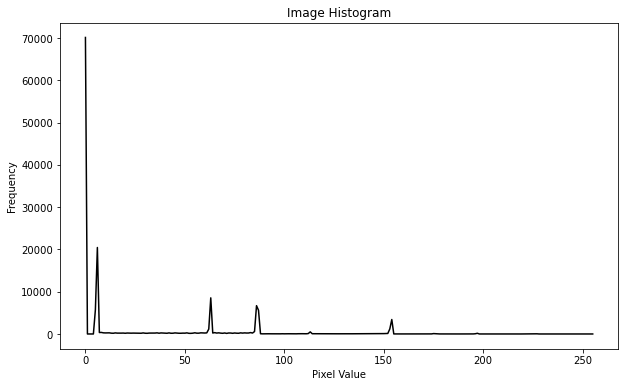

In [5]:
#histogtam visulization of original image 
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('weight.png', 0)  # Load the image in grayscale
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.figure(figsize=(10, 6))
plt.plot(histogram, color='black')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Image Histogram')
plt.show()

Text(0.5, 1.0, 'Encrypted Image')

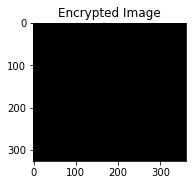

In [6]:
# Encrypt the image
encrypted_img1, dna_str = encrypt_image(img_path, 1.4, 2.3, 2.4, 2.1, 100)

# Display the encrypted image
plt.subplot(1, 2, 1)
plt.imshow(encrypted_img1, cmap='gray')
plt.title('Encrypted Image')


In [8]:
encrypted_img1.save('encrypted.png')

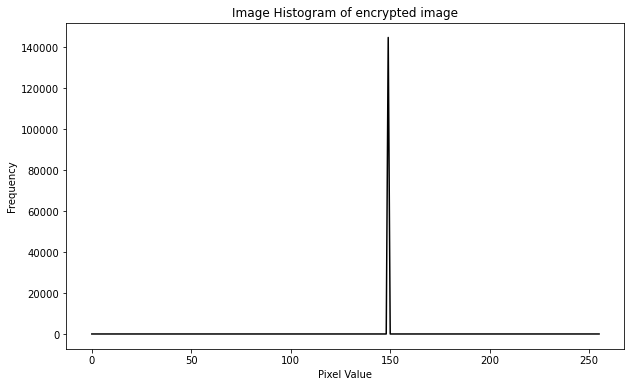

In [7]:
#histogram visualization of encrypted image
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('encrypted.png', 0)  # Load the image in grayscale
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.figure(figsize=(10, 6))
plt.plot(histogram, color='black')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Image Histogram of encrypted image')
plt.show()

In [10]:
def decode_dna(dna_str, img_shape):
    # Define the mapping from DNA nucleotides to pixel values
    nucleotides = {'A': 0, 'C': 1, 'G': 2, 'T': 3}
    # Convert the DNA string to a numpy array of pixel values
    img_arr = np.zeros(img_shape, dtype=np.uint8)
    for n, p in nucleotides.items():
        img_arr[dna_str == n] = p
    return img_arr


def decrypt_image(img_path, dna_path, a, b, c, d, iterations):
    # Load the encrypted image
    img_encrypted = Image.open(img_path)
    # Get the shape of the encrypted image
    img_shape = img_encrypted.size[::-1]
    # Load the DNA string used for encryption
    with open(dna_path, 'r') as f:
        dna_str = f.read()
    # Generate a random initial point for the chaotic map
    x, y = 1,2
    # Invert the chaotic map by iterating it in reverse
    for i in range(iterations):
        x, y = peter_de_jong(x, y, a, b, c, d)
    # Convert the shuffled DNA nucleotides back to pixel values
    img_arr = decode_dna(dna_str, img_shape)
    # Invert the modification to the pixel values caused by the chaotic map
    img_arr = (img_arr - y) / x
    # Rescale the pixel values to the range [0, 3]
    img_arr = np.round(img_arr / 64.0).astype(np.uint8)
    # Convert the pixel values to an image
    img_decrypted = Image.fromarray(img_arr*64)
    return img_decrypted

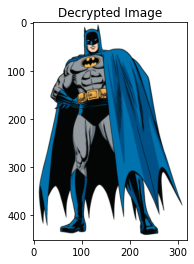

In [12]:

# Load the encrypted image and the decrypted image
decrypted_img = decrypt_image('enc_img.png', 'dna_string.txt', 1.4, 2.3, 2.4, 1.5,100)

# Load the decrypted image using PIL
final_image='weight.png'
decypted_img = Image.open(final_image)

# Plot the image
plt.imshow(decypted_img)
plt.title('Decrypted Image')
plt.show()